In [1]:
# pd & np libraries to make life easier
import pandas as pd
import numpy as np

# visualizers I'll be using
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# to perform stats tests
from scipy import stats

# all sklearn lib's functs
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support


#import all functions created in acquire , prepare & explore
import prepare
import acquire
import model
#import explore

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read TELCO data from MySQL using the get_telco_data() function in acquire.py

In [3]:
# read TELCO data from sql
df = acquire.get_telco_data()

df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
#initial data summary

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [6]:
df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [7]:
# Clean, Prep and Split df

In [ ]:
# Drop duplicate columns
df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)

In [ ]:
# Drop null values stored as whitespace    
df['total_charges'] = df['total_charges'].str.strip()
df = df[df.total_charges != '']

In [ ]:
# Convert to correct datatype
df['total_charges'] = df.total_charges.astype(float)

In [ ]:
 # Convert binary categorical variables to numeric
df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})

In [ ]:
# Get dummies for non-binary categorical variables
dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)

In [ ]:
 # Concatenate dummy dataframe to original 
df = pd.concat([df, dummy_df], axis=1)

In [ ]:
# Drop unnecessary columns
df.drop(columns=['gender','partner','dependents','phone_service', 'multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type'], inplace=True)

In [8]:
#combine all to a function and add to prepare.py
def prep_telco_data(df):
    df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)
    df['total_charges'] = df['total_charges'].str.strip()
    df = df[df.total_charges != '']
    df['total_charges'] = df.total_charges.astype(float)
    df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
    df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
    df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
    df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
    df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
    df['churn_encoded'] = df.churn.replace({'Yes': 1, 'No': 0})
    dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    df.drop(columns=['gender','partner','dependents','phone_service', \
                     'multiple_lines','online_security','online_backup', \
                     'device_protection','tech_support','streaming_tv', \
                     'streaming_movies','paperless_billing'], inplace=True)
    return df

In [9]:
df = prep_telco_data(df)

In [10]:
df.head()

,senior_citizen,tenure,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.6,593.30,No,One year,DSL,Mailed check,1,1,...,1,0,0,1,0,0,0,0,0,1
1,0,9,59.9,542.40,No,Month-to-month,DSL,Mailed check,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,4,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,13,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,...,1,0,1,0,0,1,0,0,1,0
4,1,3,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,...,1,0,0,0,0,1,0,0,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   monthly_charges                        7032 non-null   float64
 3   total_charges                          7032 non-null   float64
 4   churn                                  7032 non-null   object 
 5   contract_type                          7032 non-null   object 
 6   internet_service_type                  7032 non-null   object 
 7   payment_type                           7032 non-null   object 
 8   gender_encoded                         7032 non-null   int64  
 9   partner_encoded                        7032 non-null   int64  
 10  dependents_encoded                     7032 non-null   int64  
 11  phon

In [12]:
#split the data using train_validate_test() from prepare.py
train, validate, test = prepare.train_validate_test(df)

In [13]:
# validate and test to be out-of-sample

train.shape, validate.shape, test.shape

((3937, 35), (1688, 35), (1407, 35))

In [14]:
train.churn_encoded.value_counts()

0    2891
1    1046
Name: churn_encoded, dtype: int64

In [15]:
#overall churn rate of train set
train.churn_encoded.mean()

0.2656845313690627

Text(0.5, 0, 'Churned')

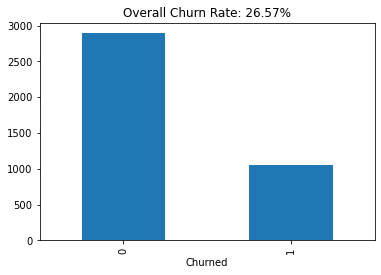

In [16]:
train.churn_encoded.value_counts().sort_index().plot.bar()
churn_rate = train.churn_encoded.mean()
plt.title(f"Overall Churn Rate: {churn_rate:.2%}")
plt.xlabel('Churned')

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

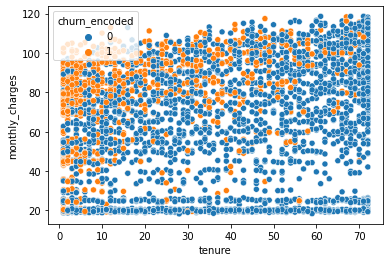

In [17]:
# Hue can hold a categorical or a continuous (recommend for categorical)
sns.scatterplot(x="tenure", y="monthly_charges", hue="churn_encoded", data=train)

<AxesSubplot:xlabel='churn', ylabel='count'>

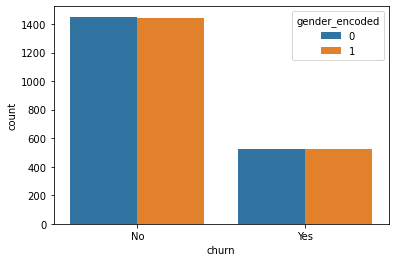

In [18]:
sns.countplot(x="churn", data=train, hue="gender_encoded")

<AxesSubplot:xlabel='churn', ylabel='count'>

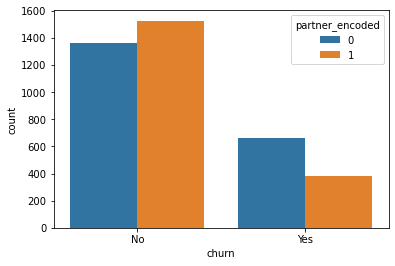

In [19]:
sns.countplot(x="churn", data=train, hue="partner_encoded")

<AxesSubplot:xlabel='churn', ylabel='count'>

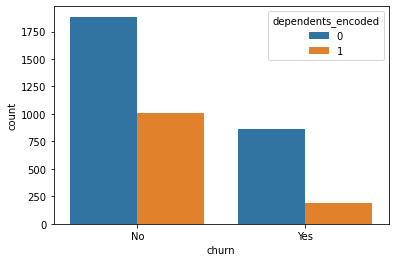

In [20]:
sns.countplot(x="churn", data=train, hue="dependents_encoded")

<AxesSubplot:xlabel='churn', ylabel='count'>

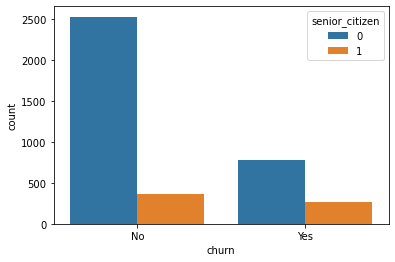

In [21]:
sns.countplot(x="churn", data=train, hue="senior_citizen")

<AxesSubplot:xlabel='churn', ylabel='count'>

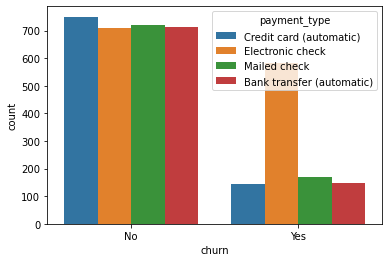

In [23]:
#electronic check has the highest rate of churn
sns.countplot(x="churn", data=train, hue="payment_type")

<AxesSubplot:xlabel='churn', ylabel='count'>

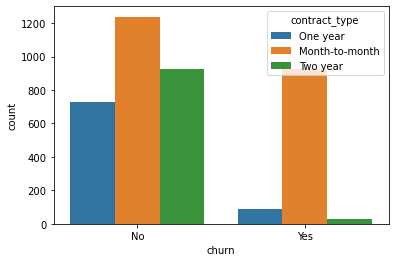

In [24]:
#month to month has the highest rate of churn
sns.countplot(x="churn", data=train, hue="contract_type")

<AxesSubplot:xlabel='tenure', ylabel='internet_service_type'>

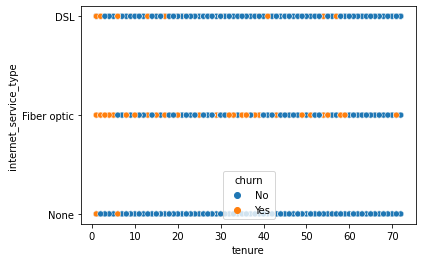

In [34]:
# Hue can hold a categorical or a continuous (recommend for categorical)
sns.scatterplot(x="tenure", y="internet_service_type", hue="churn", data=train)

<AxesSubplot:xlabel='monthly_charges', ylabel='count'>

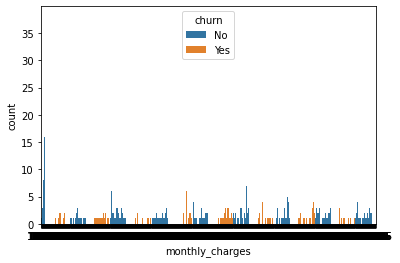

In [31]:
#fiber optic has the highest rate of churn
sns.countplot(x="monthly_charges", data=train, hue="churn") 

In [42]:
features = ['internet_service_type', 'contract_type', 'payment_type']

In [46]:
list(enumerate(features))

[(0, 'internet_service_type'),
 (1, 'contract_type'),
 (2, 'payment_type'),
 (3, 'phone_service_encoded')]

IndexError: index 3 is out of bounds for axis 0 with size 3

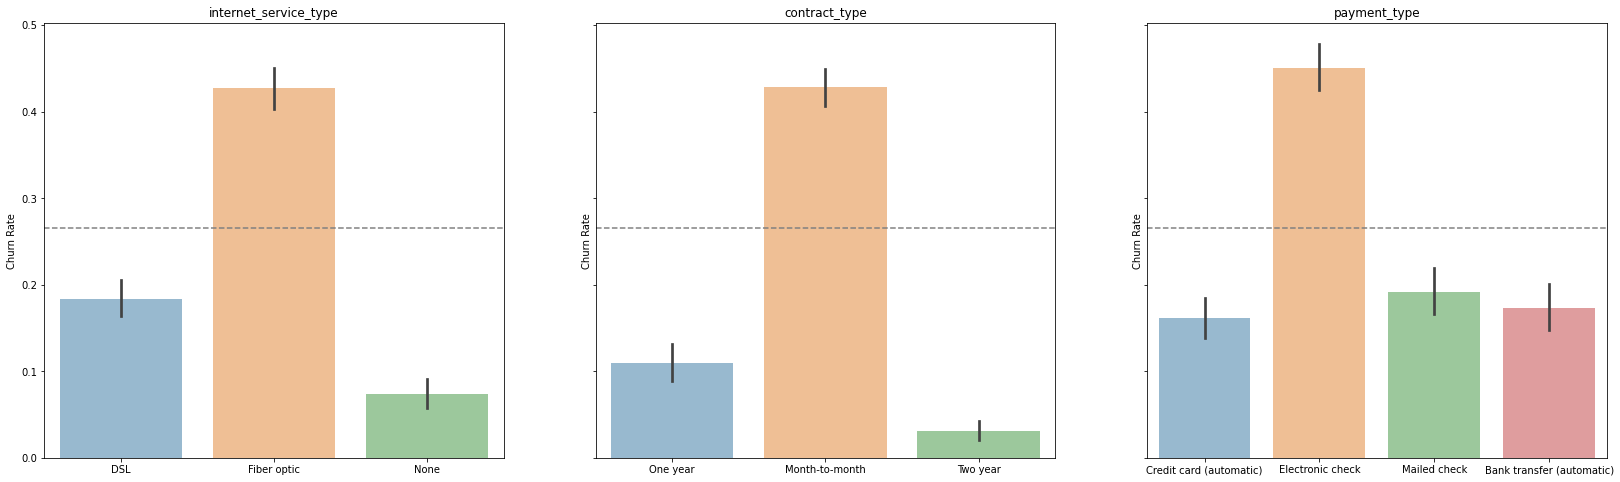

In [57]:
churn_rate = train.churn_encoded.mean()
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(28, 8), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

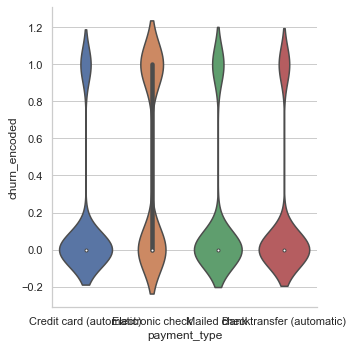

In [71]:
# Catplot with kind="count"
sns.set_theme(style="whitegrid")
sns.catplot(x="payment_type", y="churn_encoded", data=train, kind="violin")

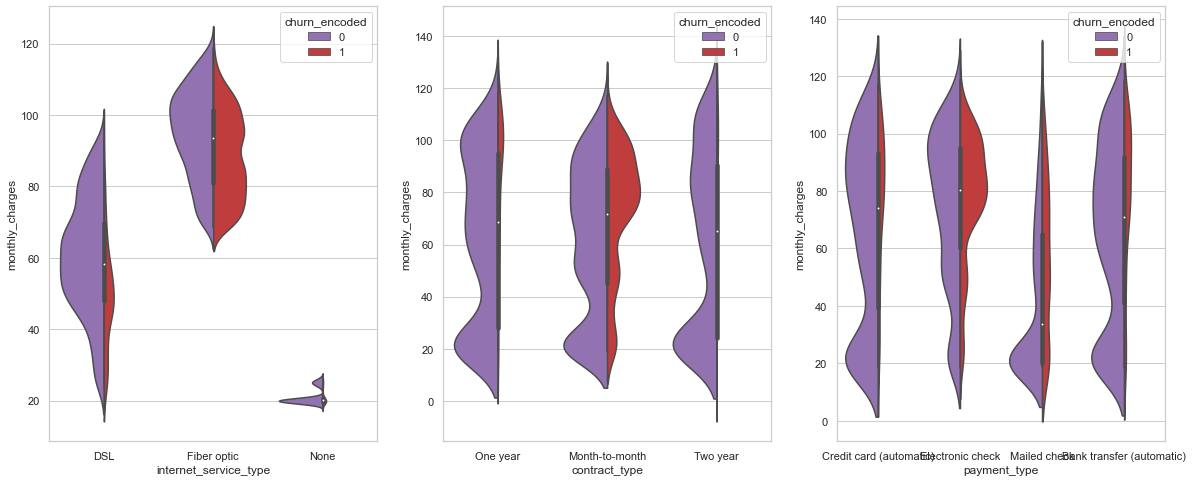

In [85]:
#shows that there is a higher cost of service for fiber optic, high churn, my guess is those are month to month paid with echeck
features = ['internet_service_type', 'contract_type', 'payment_type']
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

for i, feature in enumerate(features):
    sns.violinplot(
        feature,
        "monthly_charges",
        hue="churn_encoded",
        data=train,
        split=True,
        scale = 'count',
        ax=ax[i],
        palette=["tab:purple", "tab:red"],
    )

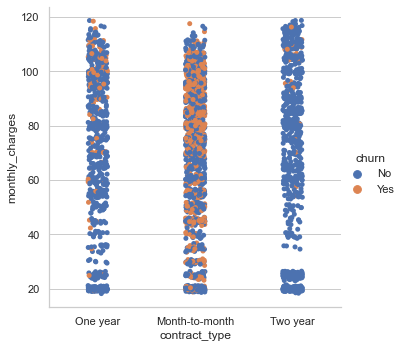

In [86]:
# Using a Catplot
sns.catplot(x="contract_type", y="monthly_charges", data=train, hue="churn")

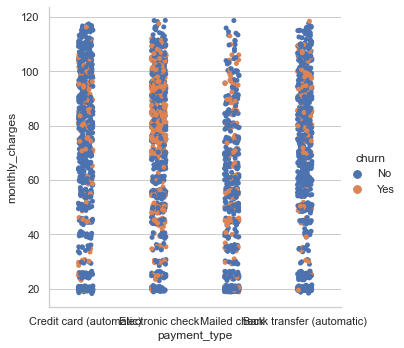

In [87]:
# Using a Catplot
sns.catplot(x="payment_type", y="monthly_charges", data=train, hue="churn")

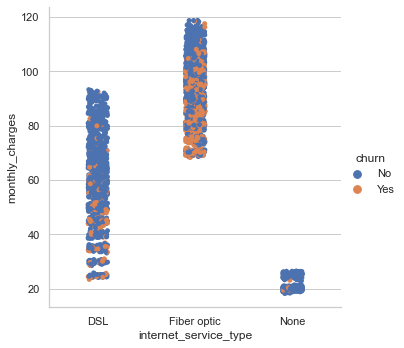

In [88]:
# Using a Catplot
sns.catplot(x="internet_service_type", y="monthly_charges", data=train, hue="churn")

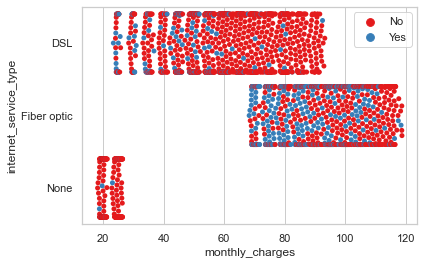

In [99]:
sns.swarmplot(x="monthly_charges", y="internet_service_type", data=train, hue="churn", palette="Set1")
plt.legend()

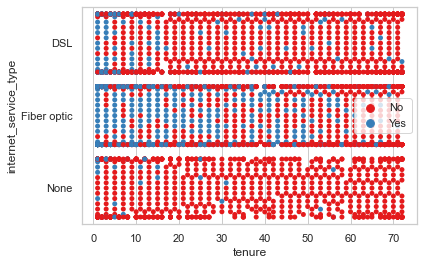

In [100]:
sns.swarmplot(x="tenure", y="internet_service_type", data=train, hue="churn", palette="Set1")
plt.legend()

In [ ]:
#split the data
train, validate, test = prepare.split_telco_data(df)

In [ ]:
train.head()

In [ ]:
df = prepare.prep_telco_data(df)

In [ ]:
df.head()